In [9]:
#!pip install kagglehub
#!pip install python-dotenv
#!pip install langchain-community
#!pip install langchain-openai
# !pip install langchain-chroma #for working with a vec database
!pip install ipywidgets
#!pip install transformers # huggingface

   ---------------------------------------- 18.1/18.1 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 318.7/318.7 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 13.2/13.2 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 46.6/46.6 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 129.8/129.8 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.11.1
    Uninstalling tomlkit-0.11.1:
      Successfully uninstalled tomlkit-0.11.1
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
botocore 1.27.28 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.5.0 which is incompatible.
pyppeteer 1.0.2 requires urllib3<2.0.0,>=1.25.8, but you have urllib3 2.5.0 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.47M/1.47M [00:00<00:00, 1.55MB/s]

Extracting files...


Path to dataset files: C:\Users\Aikaterini\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [11]:
import pandas as pd
books = pd.read_csv(f"{path}/books.csv")

In [12]:
books 

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [ ]:
# First step is inspecting the data like all MLPs
# She uses show statistics from pycharm
# For examaple look in teh title if all values are distinct so we do not have to do any deduplication 
# Subtitle column has  alot of missing observations(so this makes this column useless in itself)
# Categories: If you look at the number of distinct observations there are a lot of categories (567) and a lot of them are useless. So you would ineed to somehow standardise them to less categories bc it is a reccomender system and you dont want people to have to pick from thousand categories. 
# description has only $% missing data but should dive deep to check if this missingness is not biasing somewhere 


In [13]:
!pip install seaborn 


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

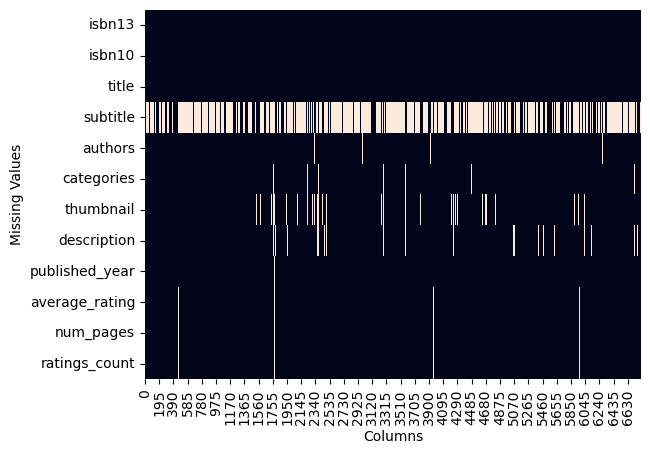

In [18]:
# Check Missing Values
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False, ax=ax) 
plt.xlabel("Columns") 
plt.ylabel("Missing Values")
plt.show()
# Subtitle is missing so you can write that variable off 
'''Categories thumbnail and description missing pattern is mostly looking random but average_rating num_pages arting_counts 
the missing data seems to have a clear pattern (that observations that have one of them missing , have all of them missing)
So these are probably from another dataset and this dataset didnt contain all of the books of this dataset
(maybe bc they have other characteristics e.g they are better/worse rated )'''
# We have to look at the books where the description is missing, bc this is the main characteristic we will be using and we 
# have to know if there is any bias in the type of description that we are missing bc we are going to get rid of these books
#(so we need to know whether the recommender will e skewed towards certain types of books)
# we have number of pages or year of publication so we can use those characteristics to see are books with missing descriptions older/newer or smaller etc

In [19]:
# Create a numeric representation of what books are missing 
import numpy as np 

books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2025 - books["published_year"]

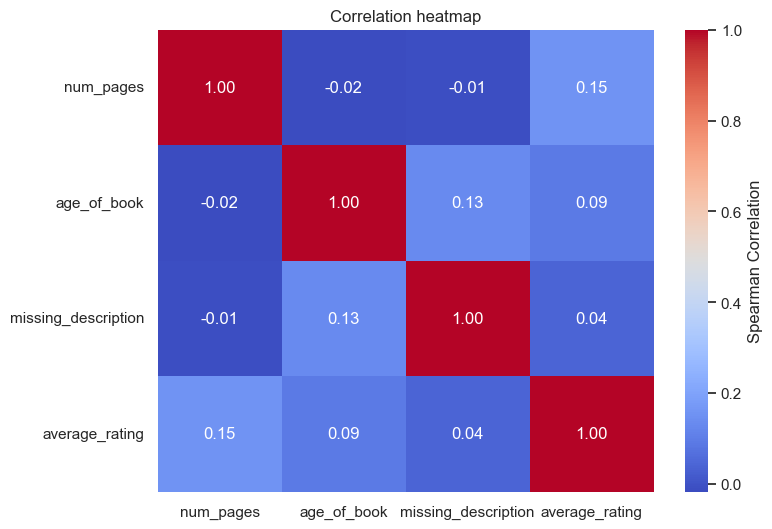

In [23]:
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]
# pearson correlation is better when you are dealing with continious variables 
# the missing description is binary so it is a more appropriate coefficient for non continuous values
corr_matrix  = books[columns_of_interest].corr(method = "spearman")
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f" , cmap="coolwarm", cbar_kws={"label":"Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()